## Dataset

```bash
.
├── Akhil
│  ├── audio
│  │  ├── Akhil1.mp3
│  │  ├── Akhil2.mp3
│  │  ├── Akhil3.mp3
│  │  ├── Akhil4.mp3
│  │  ├── Akhil5.mp3
│  │  ├── Akhil6.mp3
│  │  ├── Akhil7.mp3
│  │  ├── Akhil8.mp3
│  │  ├── Akhil9.mp3
│  │  └── Akhil10.mp3
│  └── images
│     ├── Akhil1.jpeg
│     ├── Akhil2.jpeg
│     ├── Akhil3.jpeg
│     ├── Akhil4.jpeg
│     ├── Akhil5.jpeg
│     └── Akhil6.jpeg
├── Alen
│  ├── audio
│  │  ├── Alen1.mp3
│  │  ├── Alen2.mp3
│  │  ├── Alen3.mp3
│  │  ├── Alen4.mp3
│  │  ├── Alen5.mp3
│  │  ├── Alen6.mp3
│  │  ├── Alen7.mp3
│  │  ├── Alen8.mp3
│  │  ├── Alen9.mp3
│  │  └── Alen10.mp3
│  └── images
│     ├── Alen1.jpeg
│     ├── Alen2.jpeg
│     ├── Alen3.jpeg
│     ├── Alen4.jpeg
│     └── Alen5.jpeg
├── Amaan
│  ├── audio
│  │  ├── Amaan.mp3
│  │  ├── Amaan1.mp3
│  │  ├── Amaan2.mp3
│  │  ├── Amaan3.mp3
│  │  ├── Amaan4.mp3
│  │  └── Amaan5.mp3
│  └── images
│     ├── Amaan1.jpeg
│     ├── Amaan2.jpeg
│     ├── Amaan3.jpeg
│     ├── Amaan4.jpeg
│     └── Amaan5.jpeg
├── Anshul
│  ├── audio
│  │  ├── Anshul1.mp3
│  │  ├── Anshul2.mp3
│  │  ├── Anshul3.mp3
│  │  ├── Anshul4.mp3
│  │  ├── Anshul5.mp3
│  │  └── Anshul6.mp3
│  └── images
│     ├── Anshul1.jpeg
│     ├── Anshul2.jpeg
│     ├── Anshul3.jpeg
│     ├── Anshul4.jpeg
│     └── Anshul5.jpeg
├── Neha
│  ├── audio
│  │  ├── Neha1.mp3
│  │  ├── Neha2.mp3
│  │  ├── Neha3.mp3
│  │  ├── Neha4.mp3
│  │  ├── Neha5.mp3
│  │  ├── Neha6.mp3
│  │  ├── Neha7.mp3
│  │  ├── Neha8.mp3
│  │  ├── Neha9.mp3
│  │  └── Neha10.mp3
│  └── images
│     ├── Neha1.jpeg
│     ├── Neha2.jpeg
│     ├── Neha3.jpeg
│     ├── Neha4.jpeg
│     ├── Neha5.jpeg
│     └── Neha6.jpeg
└── Shirlyn
   ├── audio
   │  ├── Shirlyn1.mp3
   │  ├── Shirlyn2.mp3
   │  ├── Shirlyn3.mp3
   │  ├── Shirlyn4.mp3
   │  ├── Shirlyn5.mp3
   │  ├── Shirlyn6.mp3
   │  ├── Shirlyn7.mp3
   │  ├── Shirlyn8.mp3
   │  ├── Shirlyn9.mp3
   │  └── Shirlyn10.mp3
   └── images
      ├── Shirlyn1.jpeg
      ├── Shirlyn2.jpeg
      ├── Shirlyn3.jpeg
      ├── Shirlyn4.jpeg
      ├── Shirlyn5.jpeg
      └── Shirlyn6.jpeg
```


In [1]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/Neha/
   creating: dataset/Neha/images/
  inflating: dataset/Neha/images/Neha3.jpeg  
  inflating: dataset/Neha/images/Neha2.jpeg  
  inflating: dataset/Neha/images/Neha6.jpeg  
  inflating: dataset/Neha/images/Neha1.jpeg  
  inflating: dataset/Neha/images/Neha4.jpeg  
  inflating: dataset/Neha/images/Neha5.jpeg  
   creating: dataset/Neha/audio/
  inflating: dataset/Neha/audio/Neha4.mp3  
  inflating: dataset/Neha/audio/Neha8.mp3  
  inflating: dataset/Neha/audio/Neha7.mp3  
  inflating: dataset/Neha/audio/Neha5.mp3  
  inflating: dataset/Neha/audio/Neha6.mp3  
  inflating: dataset/Neha/audio/Neha2.mp3  
  inflating: dataset/Neha/audio/Neha1.mp3  
  inflating: dataset/Neha/audio/Neha10.mp3  
  inflating: dataset/Neha/audio/Neha9.mp3  
  inflating: dataset/Neha/audio/Neha3.mp3  
   creating: dataset/Shirlyn/
   creating: dataset/Shirlyn/images/
  inflating: dataset/Shirlyn/images/Shirlyn3.jpeg  
  inflating: dataset/Shirl

## Imports

In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import torchaudio
import torchaudio.transforms as T
import numpy as np
from collections import defaultdict
import random
import glob
import numpy as np
import time

In [3]:
class MultiModalPersonDataset(Dataset):
    def __init__(self, root_dir, audio_sample_rate=16000, audio_n_mfcc=40, audio_max_len=500, is_train=True):
        self.root_dir = root_dir
        self.audio_sample_rate = audio_sample_rate
        self.audio_n_mfcc = audio_n_mfcc
        self.audio_max_len = audio_max_len
        self.is_train = is_train

        self.persons = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])
        self.person_to_idx = {person: idx for idx, person in enumerate(self.persons)}
        self.idx_to_person = {idx: person for person, idx in self.person_to_idx.items()}

        # Add the new 'not identified' class
        self.not_identified_label = len(self.persons) # Store the index of 'not identified'
        self.person_to_idx['not identified'] = self.not_identified_label
        self.idx_to_person[self.not_identified_label] = 'not identified'
        self.num_classes = len(self.person_to_idx) # Update num_classes to include 'not identified'

        self.all_image_paths = defaultdict(list)
        self.all_audio_paths = defaultdict(list)
        self._collect_paths()

        # This method is crucial for balancing your dataset
        self.data_pairs = self._create_data_pairs_with_mismatched()

        if self.is_train:
            self.transform_image = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(), # Good for data augmentation
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
        else: # Validation/Test
            self.transform_image = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])

        self.mfcc_transform = T.MFCC(
            sample_rate=self.audio_sample_rate,
            n_mfcc=self.audio_n_mfcc,
            melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 64}
        )

    def _collect_paths(self):
        for person_name in self.persons: # Iterate only through original persons
            image_dir = os.path.join(self.root_dir, person_name, 'images')
            audio_dir = os.path.join(self.root_dir, person_name, 'audio')

            # Collect image paths
            if os.path.exists(image_dir):
                 for f in os.listdir(image_dir):
                    if f.lower().endswith(('.jpeg', '.jpg', '.png')):
                        self.all_image_paths[person_name].append(os.path.join(image_dir, f))
            else:
                print(f"Warning: Image directory not found for {person_name}: {image_dir}")

            # Collect audio paths
            if os.path.exists(audio_dir):
                for f in os.listdir(audio_dir):
                    if f.lower().endswith(('.mp3', '.m4a', '.aac')):
                        self.all_audio_paths[person_name].append(os.path.join(audio_dir, f))
            else:
                 print(f"Warning: Audio directory not found for {person_name}: {audio_dir}")


    def _create_data_pairs_with_mismatched(self):
        pairs = []
        original_person_names = sorted(self.persons)

        # 1. Create all matched pairs
        matched_pairs = []
        for person_name in original_person_names:
            image_paths = self.all_image_paths[person_name]
            audio_paths = self.all_audio_paths[person_name]
            label = self.person_to_idx[person_name]

            for img_path in image_paths:
                for aud_path in audio_paths:
                    matched_pairs.append((img_path, aud_path, label))

        pairs.extend(matched_pairs) # Add all matched pairs to the main list

        # 2. Create mismatched pairs by sampling
        mismatched_pairs = []
        # Aim for a 1:1 ratio. Adjust if you want more (e.g., 2 * len(matched_pairs))
        target_mismatched_count = len(matched_pairs)

        # Get flattened lists of all images and all audios with their true person
        all_images_flat = []
        for p_name, paths in self.all_image_paths.items():
            for path in paths:
                all_images_flat.append((path, p_name))

        all_audios_flat = []
        for p_name, paths in self.all_audio_paths.items():
            for path in paths:
                all_audios_flat.append((path, p_name))

        # Use a set to store (img_path, aud_path) tuples to avoid adding duplicate mismatched pairs
        mismatched_set = set()

        # Loop until we reach the target count for mismatched pairs
        # Add a safety break to prevent infinite loops if data is insufficient for target_mismatched_count
        iteration_limit = target_mismatched_count * 5 # Allow more iterations than samples for safety
        current_iterations = 0

        while len(mismatched_set) < target_mismatched_count and current_iterations < iteration_limit:
            current_iterations += 1
            if not all_images_flat or not all_audios_flat: # Safety break if no image/audio data at all
                print("Warning: Not enough image/audio data to create mismatched pairs.")
                break

            # Randomly pick an image and an audio
            img_data = random.choice(all_images_flat)
            aud_data = random.choice(all_audios_flat)

            img_path, img_person = img_data
            aud_path, aud_person = aud_data

            # Check if they are from different persons AND if this specific pair hasn't been added yet
            if img_person != aud_person:
                if (img_path, aud_path) not in mismatched_set:
                    mismatched_set.add((img_path, aud_path))
                    mismatched_pairs.append((img_path, aud_path, self.not_identified_label))

        pairs.extend(mismatched_pairs) # Add the sampled mismatched pairs

        # Shuffle the combined list of pairs to thoroughly mix matched and mismatched data
        random.shuffle(pairs)

        print(f"Dataset creation completed. Matched pairs: {len(matched_pairs)}, Mismatched pairs sampled: {len(mismatched_pairs)}")
        return pairs

    def __len__(self):
        return len(self.data_pairs)

    def __getitem__(self, idx):
        img_path, aud_path, label = self.data_pairs[idx]

        image = Image.open(img_path).convert('RGB')
        image = self.transform_image(image)

        try:
            waveform, sample_rate = torchaudio.load(aud_path)
            if sample_rate != self.audio_sample_rate:
                resampler = T.Resample(sample_rate, self.audio_sample_rate)
                waveform = resampler(waveform)

            if waveform.shape[0] > 1:
                waveform = torch.mean(waveform, dim=0, keepdim=True)

            mfcc_features = self.mfcc_transform(waveform).squeeze(0)
            mfcc_features = mfcc_features.transpose(0, 1)

            if mfcc_features.shape[0] > self.audio_max_len:
                mfcc_features = mfcc_features[:self.audio_max_len, :]
            elif mfcc_features.shape[0] < self.audio_max_len:
                padding = torch.zeros(self.audio_max_len - mfcc_features.shape[0], self.audio_n_mfcc, dtype=mfcc_features.dtype)
                mfcc_features = torch.cat((mfcc_features, padding), dim=0)

            mean = mfcc_features.mean()
            std = mfcc_features.std()
            if std == 0: std = 1e-6
            mfcc_features = (mfcc_features - mean) / std

        except Exception as e:
            print(f"Error loading audio file {aud_path}: {e}")
            mfcc_features = torch.zeros(self.audio_max_len, self.audio_n_mfcc)

        return image, mfcc_features, label

In [37]:
dataset = MultiModalPersonDataset(root_dir='dataset')
print(f"Number of rows in the dataset: {len(dataset)}")

Dataset creation completed. Matched pairs: 290, Mismatched pairs sampled: 290
Number of rows in the dataset: 580


In [38]:
label_counts = defaultdict(int)
for _, _, label in dataset.data_pairs:
    label_counts[dataset.idx_to_person[label]] += 1

print("Label distribution:")
for label_name, count in sorted(label_counts.items()):
    print(f"{label_name}: {count}")

Label distribution:
Akhil: 60
Alen: 50
Amaan: 30
Anshul: 30
Neha: 60
Shirlyn: 60
not identified: 290


In [39]:
# Display some matched and mismatched rows
print("\nExample Matched and Mismatched Pairs:")
matched_examples = []
mismatched_examples = []

# Iterate through the data_pairs and collect examples
for img_path, aud_path, label in dataset.data_pairs:
    label_name = dataset.idx_to_person[label]
    pair = (img_path, aud_path, label_name)

    # Check if the image and audio paths belong to the same person based on their filenames
    img_person = os.path.basename(os.path.dirname(os.path.dirname(img_path)))
    aud_person = os.path.basename(os.path.dirname(os.path.dirname(aud_path)))

    if img_person == aud_person:
        if len(matched_examples) < 5: # Show up to 5 matched examples
            matched_examples.append(pair)
    else:
        if len(mismatched_examples) < 5: # Show up to 5 mismatched examples
            mismatched_examples.append(pair)

    # Break if we have enough examples of both
    if len(matched_examples) >= 5 and len(mismatched_examples) >= 5:
        break


print("\n--- Matched Examples ---")
if matched_examples:
    for img_path, aud_path, label_name in matched_examples:
        print(f"Image: {os.path.basename(img_path)}, Audio: {os.path.basename(aud_path)}, Predicted Label: {label_name}")
else:
    print("No matched examples found.")

print("\n--- Mismatched Examples ---")
if mismatched_examples:
    for img_path, aud_path, label_name in mismatched_examples:
         # Determine the *true* persons for image and audio for clarity
        img_person = os.path.basename(os.path.dirname(os.path.dirname(img_path)))
        aud_person = os.path.basename(os.path.dirname(os.path.dirname(aud_path)))
        print(f"Image: {os.path.basename(img_path)} (True Person: {img_person}), Audio: {os.path.basename(aud_path)} (True Person: {aud_person}), Predicted Label: {label_name}")
else:
    print("No mismatched examples found.")


Example Matched and Mismatched Pairs:

--- Matched Examples ---
Image: Shirlyn2.jpeg, Audio: Shirlyn4.mp3, Predicted Label: Shirlyn
Image: Neha6.jpeg, Audio: Neha1.mp3, Predicted Label: Neha
Image: Neha2.jpeg, Audio: Neha10.mp3, Predicted Label: Neha
Image: Anshul1.jpeg, Audio: Anshul3.mp3, Predicted Label: Anshul
Image: Akhil1.jpeg, Audio: Akhil9.mp3, Predicted Label: Akhil

--- Mismatched Examples ---
Image: Amaan4.jpeg (True Person: Amaan), Audio: Shirlyn10.mp3 (True Person: Shirlyn), Predicted Label: not identified
Image: Neha5.jpeg (True Person: Neha), Audio: Anshul2.mp3 (True Person: Anshul), Predicted Label: not identified
Image: Akhil6.jpeg (True Person: Akhil), Audio: Shirlyn1.mp3 (True Person: Shirlyn), Predicted Label: not identified
Image: Shirlyn5.jpeg (True Person: Shirlyn), Audio: Alen8.mp3 (True Person: Alen), Predicted Label: not identified
Image: Shirlyn6.jpeg (True Person: Shirlyn), Audio: Akhil2.mp3 (True Person: Akhil), Predicted Label: not identified


In [40]:
# Define the split ratios
train_ratio = 0.8
test_ratio = 0.2

# Calculate the number of samples for each split
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size # Ensure the sum is equal to the total size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"\nTotal dataset size: {total_size}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Total dataset size: 580
Training dataset size: 464
Test dataset size: 116


In [41]:
print(train_dataset.dataset.data_pairs[0])
print(train_dataset)

('dataset/Amaan/images/Amaan4.jpeg', 'dataset/Shirlyn/audio/Shirlyn10.mp3', 6)


In [9]:
class ImageCNN_Complex(nn.Module): # Renamed the class to indicate complexity
    def __init__(self, embedding_dim=512):
        super(ImageCNN_Complex, self).__init__()
        # Use ResNet50 as the backbone
        self.backbone = models.resnet50(weights=None) # Using ResNet50 with no pre-trained weights initially

        # Freeze backbone parameters
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Replace the classifier to output our desired embedding_dim
        # ResNet50's classifier is self.backbone.fc
        num_ftrs = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_ftrs, embedding_dim)

    def forward(self, x):
        return self.backbone(x)

In [10]:
class AudioRNN_Complex(nn.Module): # Renamed the class to indicate complexity
    def __init__(self, input_dim, hidden_dim=256, num_layers=2, embedding_dim=512): # Increased defaults
        super(AudioRNN_Complex, self).__init__()
        # Use GRU
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        # Output of bidirectional GRU is hidden_dim * 2
        self.fc = nn.Linear(hidden_dim * 2, embedding_dim)

    def forward(self, x):
        gru_out, hidden = self.gru(x)
        # For GRU, hidden shape is (num_layers * num_directions, batch, hidden_size)
        # We take the last layer's hidden state for both directions
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        embedding = self.fc(hidden)
        return embedding

In [42]:
class AttentionFusionModel(nn.Module): # Renamed for clarity
    def __init__(self, num_classes, image_embedding_dim=512, audio_embedding_dim=512, attention_dim=128):
        super(AttentionFusionModel, self).__init__()
        # Ensure train_dataset is defined before running this cell to access its attributes
        self.image_model = ImageCNN_Complex(embedding_dim=image_embedding_dim)
        # Access audio_n_mfcc from the original dataset object via .dataset
        self.audio_model = AudioRNN_Complex(input_dim=train_dataset.dataset.audio_n_mfcc, embedding_dim=audio_embedding_dim)

        self.image_embedding_dim = image_embedding_dim
        self.audio_embedding_dim = audio_embedding_dim
        self.attention_dim = attention_dim # Store attention_dim as an instance variable

        # Attention Mechanism layers
        self.attention_layer1 = nn.Linear(self.image_embedding_dim + self.audio_embedding_dim, self.attention_dim)
        self.attention_layer2 = nn.Linear(self.attention_dim, 2) # Output 2 scores: one for image, one for audio

        # Linear layer for final classification
        self.fusion_fc = nn.Linear(self.image_embedding_dim + self.audio_embedding_dim, num_classes)

    def forward(self, image_input, audio_input):
        # Get embeddings from individual models
        image_embedding = self.image_model(image_input)
        audio_embedding = self.audio_model(audio_input)

        # Concatenate original embeddings for attention
        combined_original = torch.cat((image_embedding, audio_embedding), dim=1)

        # Calculate attention weights
        attention_scores = self.attention_layer2(torch.tanh(self.attention_layer1(combined_original))) # Shape: (batch_size, 2)
        attention_weights = F.softmax(attention_scores, dim=1) # Softmax across the 2 modalities

        # Split attention weights
        # Access attention_dim using self.attention_dim
        image_attn_weight = attention_weights[:, 0].unsqueeze(1) # Shape: (batch_size, 1)
        audio_attn_weight = attention_weights[:, 1].unsqueeze(1) # Shape: (batch_size, 1)

        # Apply weights to original embeddings
        # Need to unsqueeze weights to match embedding dimensions for multiplication
        image_attended = image_embedding * image_attn_weight.expand_as(image_embedding)
        audio_attended = audio_embedding * audio_attn_weight.expand_as(audio_embedding)

        # Concatenate attended embeddings
        combined_attended_embedding = torch.cat((image_attended, audio_attended), dim=1)

        # Pass through the final classification layer
        output = self.fusion_fc(combined_attended_embedding)

        return output

# Example Usage (update model name)
# Ensure train_dataset is defined before running this cell
# Access num_classes from the original dataset object via .dataset
num_classes = train_dataset.dataset.num_classes
model = AttentionFusionModel(num_classes=num_classes) # Changed model name
print(model)

# Dummy forward pass to check output shape
dummy_images = torch.randn(16, 3, 224, 224) # Batch size 16, 3 channels, 224x224
# Ensure train_dataset is defined before running this cell to access its attributes
# Access audio_n_mfcc from the original dataset object via .dataset
max_audio_frames = train_dataset.dataset.audio_max_len
dummy_audios = torch.randn(16, max_audio_frames, train_dataset.dataset.audio_n_mfcc) # Batch size 16, max_len, n_mfcc

with torch.no_grad(): # No need to compute gradients for this test
    output = model(dummy_images, dummy_audios)
    print(f"Output shape: {output.shape}") # Expected: (batch_size, num_classes)

AttentionFusionModel(
  (image_model): ImageCNN_Complex(
    (backbone): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [57]:
dataset = MultiModalPersonDataset(root_dir='dataset')
print(f"Number of rows in the dataset: {len(dataset)}")

label_counts = defaultdict(int)
for _, _, label in dataset.data_pairs:
    label_counts[dataset.idx_to_person[label]] += 1

print("Label distribution:")
for label_name, count in sorted(label_counts.items()):
    print(f"{label_name}: {count}")

# Define the split ratios
train_ratio = 0.8
test_ratio = 0.2

# Calculate the number of samples for each split
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size # Ensure the sum is equal to the total size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"\nTotal dataset size: {total_size}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

BATCH_SIZE = 32
NUM_WORKERS = 4 # Adjust based on your system's CPU cores and RAM

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

print(f"\nTrain DataLoader created with {len(train_loader)} batches.")
print(f"Test DataLoader created with {len(test_loader)} batches.")

# Get num_classes from the dataset object
num_classes = dataset.num_classes

# Hyperparameters
num_epochs = 10 # Increased epochs - Consider increasing further if needed
learning_rate = 0.001 # Kept learning rate the same
weight_decay = 1e-4 # Added L2 regularization (weight decay)
# batch_size is set in the DataLoader

# --- CRITICAL: Initialize AttentionFusionModel's audio_model ---
# The input_dim for AudioRNN_Complex comes from the dataset's audio_n_mfcc
model = AttentionFusionModel(num_classes=num_classes).to(device)
model.audio_model = AudioRNN_Complex(input_dim=dataset.audio_n_mfcc, embedding_dim=model.audio_embedding_dim).to(device)
print(model) # Print model architecture

# --- ADD CLASS WEIGHTS CALCULATION HERE ---
print("\nCalculating class weights for CrossEntropyLoss...")

# 1. Get the class counts from your training data split
# We use 'dataset.data_pairs[i][2]' because 'train_dataset' is a Subset view
# on the original 'dataset', and its 'indices' point back to 'dataset'.
train_labels_list = [dataset.data_pairs[i][2] for i in train_dataset.indices]

class_counts = defaultdict(int)
for label_idx in train_labels_list:
    class_counts[label_idx] += 1

print(f"Raw class counts in training data split: {class_counts}")

# 2. Calculate the weights
total_samples_in_train_split = len(train_labels_list)
# num_classes is already derived from 'dataset.num_classes' above

class_weights = torch.zeros(num_classes)
for i in range(num_classes):
    count = class_counts[i]
    if count == 0:
        class_weights[i] = 0.0 # Assign 0 if a class is completely absent in the split
        print(f"Warning: Class {dataset.idx_to_person[i]} (ID {i}) has 0 samples in training data split.")
    elif i == dataset.not_identified_label:
        # Assign base inverse frequency, then multiply by the boost factor
        base_weight = total_samples_in_train_split / (num_classes * count)
        class_weights[i] = base_weight * 3.97
    elif i == dataset.person_to_idx["Alen"] or i == dataset.person_to_idx["Shirlyn"]:
        class_weights[i] = total_samples_in_train_split / (num_classes * count) * 1.3
    else:
        # Inverse frequency weighting: total_samples / (num_classes * count_of_class)
        class_weights[i] = total_samples_in_train_split / (num_classes * count)

print(f"Calculated class weights: {class_weights}")

# 3. Move weights to the same device as your model
class_weights = class_weights.to(device)

# --- LOSS AND OPTIMIZER (CRITICAL: Single criterion as your model has one output) ---
# Your AttentionFusionModel returns a single output, so we need only one criterion
criterion = nn.CrossEntropyLoss(weight=class_weights) # Pass the calculated weights here
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Optional: Learning Rate Scheduler (Example: Reduce LR on plateau)
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)


# --- Training loop ---
print("\nStarting training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    start_time = time.time() # Start time for the epoch

    for i, (images, audios, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        audios = audios.to(device)
        labels = labels.to(device)

        # Forward pass: Your AttentionFusionModel returns a single 'output'
        outputs = model(images, audios)

        # Calculate loss using the single, weighted criterion
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy based on the single output
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (i+1) % 10 == 0: # Print progress every 10 batches
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    epoch_time = time.time() - start_time
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct_train / total_train

    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%, Time: {epoch_time:.2f}s')

    # Evaluation on the test set after each epoch
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        correct_test = 0
        total_test = 0
        test_loss = 0.0
        for images, audios, labels in test_loader:
            images = images.to(device)
            audios = audios.to(device)
            labels = labels.to(device)

            # Forward pass: Single output
            outputs = model(images, audios)
            test_loss += criterion(outputs, labels).item() # Use the single criterion
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_loss /= len(test_loader)
        test_acc = 100 * correct_test / total_test
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

        # Optional: Step the scheduler based on validation loss
        # if 'scheduler' in locals(): # Check if scheduler was initialized
        #    scheduler.step(test_loss)

print('Finished Training')


Dataset creation completed. Matched pairs: 290, Mismatched pairs sampled: 290
Number of rows in the dataset: 580
Label distribution:
Akhil: 60
Alen: 50
Amaan: 30
Anshul: 30
Neha: 60
Shirlyn: 60
not identified: 290

Total dataset size: 580
Training dataset size: 464
Test dataset size: 116
Using device: cuda

Train DataLoader created with 15 batches.
Test DataLoader created with 4 batches.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


AttentionFusionModel(
  (image_model): ImageCNN_Complex(
    (backbone): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 1.2335, Test Accuracy: 47.41%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10], Step [10/15], Loss: 0.9959
Epoch [2/10], Average Loss: 1.0217, Training Accuracy: 44.61%, Time: 18.45s
Test Loss: 0.8444, Test Accuracy: 56.90%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10], Step [10/15], Loss: 0.8442
Epoch [3/10], Average Loss: 0.8613, Training Accuracy: 50.43%, Time: 18.48s
Test Loss: 1.0576, Test Accuracy: 41.38%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10], Step [10/15], Loss: 0.6427
Epoch [4/10], Average Loss: 0.7876, Training Accuracy: 51.94%, Time: 18.44s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.9355, Test Accuracy: 56.03%
Epoch [5/10], Step [10/15], Loss: 1.0195
Epoch [5/10], Average Loss: 0.9249, Training Accuracy: 50.65%, Time: 18.41s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.8503, Test Accuracy: 54.31%
Epoch [6/10], Step [10/15], Loss: 0.9642
Epoch [6/10], Average Loss: 0.9182, Training Accuracy: 45.69%, Time: 18.13s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.7586, Test Accuracy: 49.14%
Epoch [7/10], Step [10/15], Loss: 0.8356
Epoch [7/10], Average Loss: 0.7820, Training Accuracy: 50.22%, Time: 18.51s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.8004, Test Accuracy: 43.97%
Epoch [8/10], Step [10/15], Loss: 0.8092
Epoch [8/10], Average Loss: 0.7192, Training Accuracy: 52.37%, Time: 19.00s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.7118, Test Accuracy: 53.45%


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10], Step [10/15], Loss: 0.5814
Epoch [9/10], Average Loss: 0.6914, Training Accuracy: 53.45%, Time: 19.70s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Loss: 0.8612, Test Accuracy: 44.83%
Epoch [10/10], Step [10/15], Loss: 0.7197
Epoch [10/10], Average Loss: 0.6537, Training Accuracy: 62.72%, Time: 19.92s
Test Loss: 0.6453, Test Accuracy: 59.48%
Finished Training


<Figure size 1000x800 with 0 Axes>

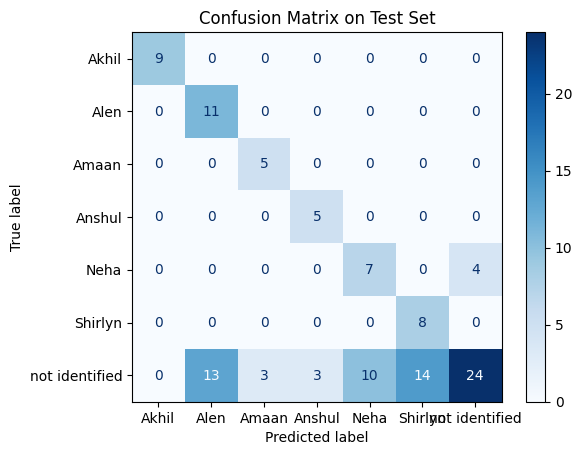

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval() # Set model to evaluation mode
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, audios, labels in test_loader:
        images = images.to(device)
        audios = audios.to(device)
        labels = labels.to(device)

        outputs = model(images, audios)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Get class names, including 'not identified'
class_names = [train_dataset.dataset.idx_to_person[i] for i in sorted(train_dataset.dataset.idx_to_person.keys())]

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Display confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Set')
plt.show()

In [59]:
model.eval() # Set model to evaluation mode

matched_correct = 0
matched_total = 0
mismatched_correct = 0
mismatched_total = 0

with torch.no_grad():
    for images, audios, labels in test_loader:
        images = images.to(device)
        audios = audios.to(device)
        labels = labels.to(device)

        outputs = model(images, audios)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(labels.size(0)):
            # original_index_in_dataset = test_data.indices[i + test_loader.batch_size * (test_loader.batch_sampler.batch_iter.__self__.batch_indices_history[-1] // test_loader.batch_size)] if hasattr(test_loader.batch_sampler, 'batch_indices_history') else -1
            # Note: Getting the exact original index from the Subset can be complex in iterating batches.
            # For simplicity here, we rely on the label itself to identify matched/mismatched.
            # A more robust way might involve modifying the Dataset or DataLoader to return pair info.

            # Access idx_to_person from the original dataset object via .dataset
            label_name = test_dataset.dataset.idx_to_person[labels[i].item()]
            predicted_name = test_dataset.dataset.idx_to_person[predicted[i].item()]

            if label_name != 'not identified': # This is a matched pair
                matched_total += 1
                if predicted[i].item() == labels[i].item():
                    matched_correct += 1
            else: # This is a mismatched pair
                mismatched_total += 1
                if predicted[i].item() == labels[i].item():
                    mismatched_correct += 1

matched_accuracy = (matched_correct / matched_total) * 100 if matched_total > 0 else 0
mismatched_accuracy = (mismatched_correct / mismatched_total) * 100 if mismatched_total > 0 else 0

print("\n--- Matched vs Mismatched Pair Evaluation ---")
print(f"Total Matched Pairs in Test Set: {matched_total}")
print(f"Correctly Classified Matched Pairs: {matched_correct}")
print(f"Accuracy on Matched Pairs: {matched_accuracy:.2f}%")

print(f"\nTotal Mismatched Pairs in Test Set: {mismatched_total}")
print(f"Correctly Classified Mismatched Pairs: {mismatched_correct}")
print(f"Accuracy on Mismatched Pairs: {mismatched_accuracy:.2f}%")


--- Matched vs Mismatched Pair Evaluation ---
Total Matched Pairs in Test Set: 49
Correctly Classified Matched Pairs: 45
Accuracy on Matched Pairs: 91.84%

Total Mismatched Pairs in Test Set: 67
Correctly Classified Mismatched Pairs: 25
Accuracy on Mismatched Pairs: 37.31%


In [60]:
model_save_path = 'attention_fusion_model.pth'

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to attention_fusion_model.pth
